# Effect of deploying solar energy in Lexington, KY

## COLLECT DATA

### Initial Demand Curve

,Demand (W)
dt,
2013-01-01 00:00:00,2409120.0
2013-01-01 01:00:00,2409120.0
2013-01-01 02:00:00,2397600.0
2013-01-01 03:00:00,2377440.0
2013-01-01 04:00:00,2404800.0


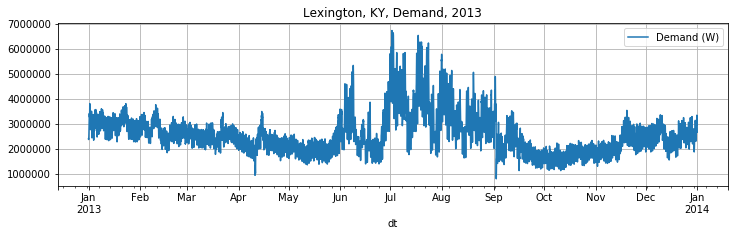

In [88]:
%matplotlib inline
import pandas as pd
from datetime import datetime as dt, timedelta
# uncomment below if you'd like to be able to zoom in graphics
# import mpld3
# mpld3.enable_notebook()
style = {'figsize': (12, 3), 'grid': True}

df_before = pd.read_csv('Demand.csv', names=['demand'])
df_before['dt'] = [(dt(2013, 1, 1) + timedelta(hours=1)*x) for x in range(8760)]
df_before = df_before.set_index('dt')
df_before.columns = ['Demand (W)']
df_before['Demand (W)'] *= 1000 # convert to W
df_before.plot(title='Lexington, KY, Demand, 2013', **style)
df_before.head()

### Solar Generation Curve

,Solar Output (W)
dt,
2013-01-01 00:00:00,0.0
2013-01-01 01:00:00,0.0
2013-01-01 02:00:00,0.0
2013-01-01 03:00:00,0.0
2013-01-01 04:00:00,0.0
2013-01-01 05:00:00,0.0
2013-01-01 06:00:00,0.0
2013-01-01 07:00:00,0.0
2013-01-01 08:00:00,0.0


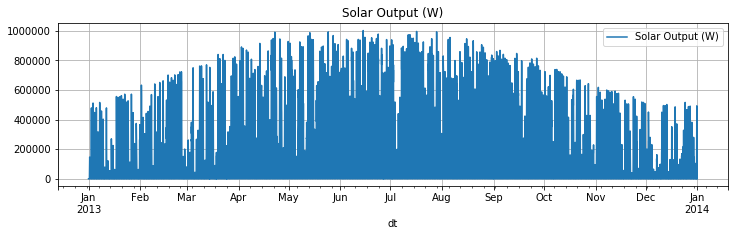

In [89]:
'''
import json
JSON_FILE = 'SolarOutput.json'
with open(JSON_FILE) as f:
    solar_energy = json.load(f)['Consumption']['Power']
df_carve = pd.DataFrame(solar_energy, columns=['Solar Output (W)'])
'''

df_carve = pd.read_csv('Solarad_KY_Versaille_2013.csv', header=None)
df_carve.columns = ['Solar Output (W)']
df_carve['dt'] = [(dt(2013, 1, 1) + timedelta(hours=1)*x) for x in range(8760)]
df_carve.set_index('dt', inplace=True)
df_carve *= 1000 # convert to W
df_carve.plot(title='Solar Output (W)', **style)
df_carve.head(24)

### New Demand Curve

dt
2013-01-01 00:00:00    2409120.0
2013-01-01 01:00:00    2409120.0
2013-01-01 02:00:00    2397600.0
2013-01-01 03:00:00    2377440.0
2013-01-01 04:00:00    2404800.0
2013-01-01 05:00:00    2478240.0
2013-01-01 06:00:00    2625120.0
2013-01-01 07:00:00    2769120.0
2013-01-01 08:00:00    2913120.0
2013-01-01 09:00:00    3100320.0
2013-01-01 10:00:00    3363840.0
2013-01-01 11:00:00    3409920.0
2013-01-01 12:00:00    3420000.0
2013-01-01 13:00:00    3373800.0
2013-01-01 14:00:00    3243520.0
2013-01-01 15:00:00    3187680.0
2013-01-01 16:00:00    3261440.0
2013-01-01 17:00:00    3368040.0
2013-01-01 18:00:00    3684440.0
2013-01-01 19:00:00    3613200.0
2013-01-01 20:00:00    3685880.0
2013-01-01 21:00:00    3644520.0
2013-01-01 22:00:00    3466080.0
2013-01-01 23:00:00    3183840.0
dtype: float64

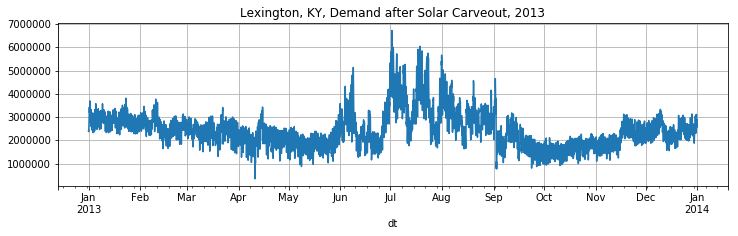

In [90]:
df_after = df_before['Demand (W)'] - df_carve['Solar Output (W)']
df_after.plot(title='Lexington, KY, Demand after Solar Carveout, 2013', **style)
df_after.head(24)

In [91]:
df_csv = df_after/1000 # convert back to kW for export
df_csv.to_csv('Carveout.csv', index=False)

## CALCULATIONS

In [92]:
# place everything in one dataframe for analysis
df = pd.DataFrame([df_before.index, df_before['Demand (W)'], df_after]).T
df = df.set_index(0)
df.index.name = 'dt'
df.columns = ['before', 'after']
df.head()

,before,after
dt,,
2013-01-01 00:00:00,2.40912e+06,2.40912e+06
2013-01-01 01:00:00,2.40912e+06,2.40912e+06
2013-01-01 02:00:00,2.3976e+06,2.3976e+06
2013-01-01 03:00:00,2.37744e+06,2.37744e+06
2013-01-01 04:00:00,2.4048e+06,2.4048e+06


# ANNUAL TESTING ---------------------------------------------------

In [93]:
bMax = df['before'].max()
aMax = df['after'].max()
bSum = df['before'].sum()
aSum = df['after'].sum()

print('Annual Max (W)')
print('\tBEFORE:\t', bMax)
print('\tAFTER:\t', aMax)
print('\t% DIF:\t {:.2f}%\n'.format((aMax - bMax)/bMax*100))

print('Annual Demand (kW)')
print('\tBEFORE:\t {:.2f}'.format(bSum/1000))
print('\tAFTER:\t {:.2f}'.format(aSum/1000))
print('\t% DIF:\t {:.2f}%\n'.format((aSum - bSum)/bSum*100))


Annual Max (W)
	BEFORE:	 6746400.0
	AFTER:	 6720400.0
	% DIF:	 -0.39%

Annual Demand (kW)
	BEFORE:	 22663357.92
	AFTER:	 21223913.92
	% DIF:	 -6.35%



# MONTHLY TESTING ---------------------------------------------------

/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,Demand Reduction (% Dec),Energy Reduction (% Dec)
month,,
1,0.075443,2.744073
2,0.000000,4.348059
3,1.269147,5.459017
4,2.015631,8.903935
5,0.500400,10.995508
6,8.195683,9.105138
7,0.385391,5.733828
8,3.385753,6.955689
9,5.117603,9.630333


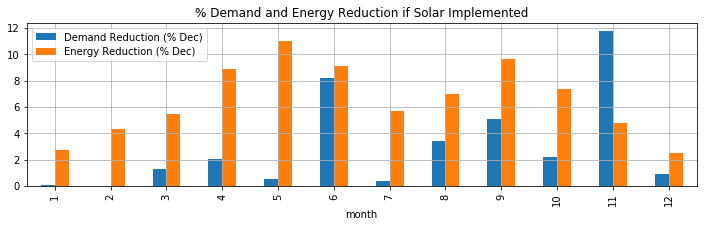

In [94]:
tests = {'demand': 'max', 'energy': 'sum'}
aggregation = {'before': tests, 'after': tests}
df_agg_month = df.groupby(df.index.month).agg(aggregation)

df_effects = pd.DataFrame()
before, after = df_agg_month['before'], df_agg_month['after']
df_effects['Demand Reduction (% Dec)'] = (before['demand'] - after['demand'])/before['demand'] * 100
df_effects['Energy Reduction (% Dec)'] = (before['energy'] - after['energy'])/before['energy'] * 100
df_effects.index.name = 'month'

df_effects.plot.bar(title='% Demand and Energy Reduction if Solar Implemented', **style)
df_effects

# Case 2 and 3: Optimal Storage, Optimal Storage w Solar

In [95]:
import json
JSON_FILE = 'StorageOutput.json'
with open(JSON_FILE) as f:
    after_storage = json.load(f)['demandAfterBattery']
after_storage = pd.DataFrame(after_storage, columns=['Storage'])

JSON_FILE2 = 'SolarStorageOutput.json'
with open(JSON_FILE) as f:
    after_storageAndSolar = json.load(f)['demandAfterBattery']
after_storageAndSolar = pd.DataFrame(after_storageAndSolar, columns=['Storage and Solar'])

In [96]:
df2 = pd.DataFrame([df_before.index, df_before['Demand (W)'], after_storage['Storage'], after_storageAndSolar['Storage and Solar']]).T
df2 = df2.set_index(0)
df2.index.name = 'dt'
df2.columns = ['before', 'after storage', 'after storage and solar']
df2.head()


,before,after storage,after storage and solar
dt,,,
2013-01-01 00:00:00,2.40912e+06,2.40912e+06,2.40912e+06
2013-01-01 01:00:00,2.40912e+06,2.40912e+06,2.40912e+06
2013-01-01 02:00:00,2.3976e+06,2.3976e+06,2.3976e+06
2013-01-01 03:00:00,2.37744e+06,2.37744e+06,2.37744e+06
2013-01-01 04:00:00,2.4048e+06,2.4048e+06,2.4048e+06


In [97]:
df_agg_month2 = df2.groupby(df2.index.month).max()
df_agg_month2

,before,after storage,after storage and solar
dt,,,
1,3817440.0,3279440.0,3279440.0
2,3774240.0,3147240.0,3147240.0
3,3457440.0,2821440.0,2821440.0
4,3500640.0,2951640.0,2951640.0
5,3597120.0,2858120.0,2858120.0
6,5811840.0,5063840.0,5063840.0
7,6746400.0,5957400.0,5957400.0
8,5204160.0,4389160.0,4389160.0
9,4904640.0,3947640.0,3947640.0


,Demand Reduction (% Dec),Energy Reduction (% Dec),Demand Reduction after storage (% Dec),Demand Reduction after storage and solar (% Dec)
month,,,,
1,0.075443,2.744073,14.093214,14.093214
2,0.000000,4.348059,16.612616,16.612616
3,1.269147,5.459017,18.395113,18.395113
4,2.015631,8.903935,15.682847,15.682847
5,0.500400,10.995508,20.544213,20.544213
6,8.195683,9.105138,12.870279,12.870279
7,0.385391,5.733828,11.695126,11.695126
8,3.385753,6.955689,15.660548,15.660548
9,5.117603,9.630333,19.512135,19.512135


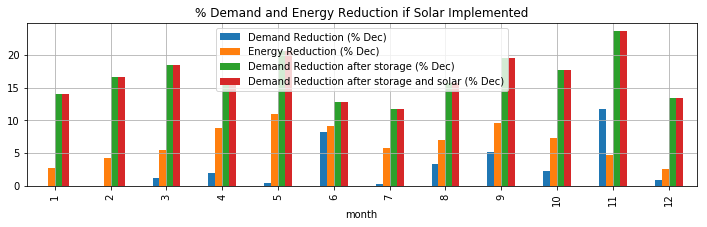

In [98]:
before = df_agg_month2['before']
after_storage = df_agg_month2['after storage']
after_storageAndSolar = df_agg_month2['after storage and solar']
df_effects['Demand Reduction after storage (% Dec)'] = (before - after_storage)/before * 100
df_effects['Demand Reduction after storage and solar (% Dec)'] = (before - after_storageAndSolar)/before * 100
df_effects.plot.bar(title='% Demand and Energy Reduction if Solar Implemented', **style)
df_effects